## Code to visualize Transformer Embeddings

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.decomposition import PCA
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/daiwoz/best_questions.csv",index_col=0).rename(columns={"value":"intervention","id":"patient_id"})

data

,patient_id,intervention,question,start_time,end_time,question_text,Gender,PHQ8_Score,PHQ8_Binary,split,word_count
0,300,good,0,62.328,63.178,how are you doing today,1,2,0,test,1
1,300,um probably about two weeks ago. uh frustrated...,1,227.998,267.988,when was the last time you argued with someone...,1,2,0,test,31
2,300,i'm i'm i'm pretty good at it um. yeah,2,217.728,222.068,how are you at controlling your temper,1,2,0,test,9
3,300,uh it's pretty easy. uh yes,4,430.858,437.598,how easy is it for you to get a good night's s...,1,2,0,test,6
4,300,no,5,470.658,471.348,have you been diagnosed with depression,1,2,0,test,1
...,...,...,...,...,...,...,...,...,...,...,...
2133,307,huh really happy oh when i was in mexico over ...,11,1163.838,1207.308,tell me about the last time you felt really happy,0,4,0,val,64
2134,308,mm it isn't yawn it isn't. yes it eh yes that ...,4,358.056,413.169,how easy is it for you to get a good night's s...,0,22,1,test,71
2135,308,yes. mm about three years ago four years ago c...,5,415.478,448.458,have you been diagnosed with depression,0,22,1,test,38
2136,308,uh loyal emotional strong that's it,8,752.232,766.762,how would your best friend describe you,0,22,1,test,6


In [4]:
import pandas as pd
import numpy as np

def stratify_column(df, column_name):
    ranges = [0, 4, 9, 14, 19, 40]
    labels = [0,1,2,3,4]

    df['PHQ8_Severity'] = pd.cut(df[column_name], bins=ranges, labels=labels,include_lowest=True)
    return df

# Example usage:
# Assuming your dataframe is called 'df' and the column you want to stratify is called 'depressive_scores'
data = stratify_column(data, 'PHQ8_Score')
data["PHQ_Binary_mild"] = np.where(data["PHQ8_Score"] > 5, 1, 0)
data

,patient_id,intervention,question,start_time,end_time,question_text,Gender,PHQ8_Score,PHQ8_Binary,split,word_count,PHQ8_Severity,PHQ_Binary_mild
0,300,good,0,62.328,63.178,how are you doing today,1,2,0,test,1,0,0
1,300,um probably about two weeks ago. uh frustrated...,1,227.998,267.988,when was the last time you argued with someone...,1,2,0,test,31,0,0
2,300,i'm i'm i'm pretty good at it um. yeah,2,217.728,222.068,how are you at controlling your temper,1,2,0,test,9,0,0
3,300,uh it's pretty easy. uh yes,4,430.858,437.598,how easy is it for you to get a good night's s...,1,2,0,test,6,0,0
4,300,no,5,470.658,471.348,have you been diagnosed with depression,1,2,0,test,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,307,huh really happy oh when i was in mexico over ...,11,1163.838,1207.308,tell me about the last time you felt really happy,0,4,0,val,64,0,0
2134,308,mm it isn't yawn it isn't. yes it eh yes that ...,4,358.056,413.169,how easy is it for you to get a good night's s...,0,22,1,test,71,4,1
2135,308,yes. mm about three years ago four years ago c...,5,415.478,448.458,have you been diagnosed with depression,0,22,1,test,38,4,1
2136,308,uh loyal emotional strong that's it,8,752.232,766.762,how would your best friend describe you,0,22,1,test,6,4,1


In [12]:
def visualize_embeddings(hidden_states, ys, questions,model):
    dim_reducer = PCA(n_components=2)

    # Increase the figure size
    fig, axs = plt.subplots(3, 5, figsize=(20, 12))

    # Flatten the axes array
    axs = axs.ravel()


    # Iterate over each question's embeddings and labels
    for q_idx, (embeddings_q, labels_q, question) in enumerate(zip(hidden_states, ys, questions)):
        if model == "wav2vec2":
          averaged_hidden_state = torch.mean(embeddings_q,dim=1)
        elif model == "roberta":
          averaged_hidden_state = embeddings_q[:,0,:]
        else:
          averaged_hidden_state = embeddings_q.squeeze(1)

        dim_reduced_vectors = dim_reducer.fit_transform(averaged_hidden_state)

        df = pd.DataFrame.from_dict({'x': dim_reduced_vectors[:,0], 'y': dim_reduced_vectors[:,1], 'label': labels_q})
        df.label = df.label.astype(int)


        sns.scatterplot(data=df, x='x', y='y', hue='label', edgecolor=None, ax=axs[q_idx],alpha=0.7)

        axs[q_idx].set_title(f"Question {question+1}", fontsize=15)
        axs[q_idx].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    # Remove unused subplots
    for idx in range(q_idx+1, len(axs)):
        fig.delaxes(axs[idx])

    plt.tight_layout()
    plt.show()



def get_data_for_visualization(data, model,col):
    all_questions = []
    all_embeds = []
    all_labels = []

    # Sort the unique questions
    sorted_questions = sorted(data['question'].unique())

    for question in sorted_questions:
        question_embeds = []
        question_labels = []

        if model != "wav2vec2":
          embeds_dictionary = torch.load(f"/content/gdrive/MyDrive/daiwoz/question_embeddings/{model}_{question}_embeddings_base.pt",map_location=torch.device('cpu'))
        else:
          embeds_dictionary = torch.load(f"/content/gdrive/MyDrive/daiwoz/question_embeddings/{question}_embeddings_er.pt",map_location=torch.device('cpu'))

        question_data = data.loc[data['question'] == question]

        for id in question_data['patient_id'].unique():
            label = question_data.loc[question_data['patient_id'] == id][col].values[0]

            question_embeds.append(embeds_dictionary[id])
            question_labels.append(label)

        all_embeds.append(torch.stack(question_embeds))
        all_labels.append(torch.Tensor(question_labels).squeeze())
        all_questions.append(question)

    return all_embeds, all_labels, all_questions



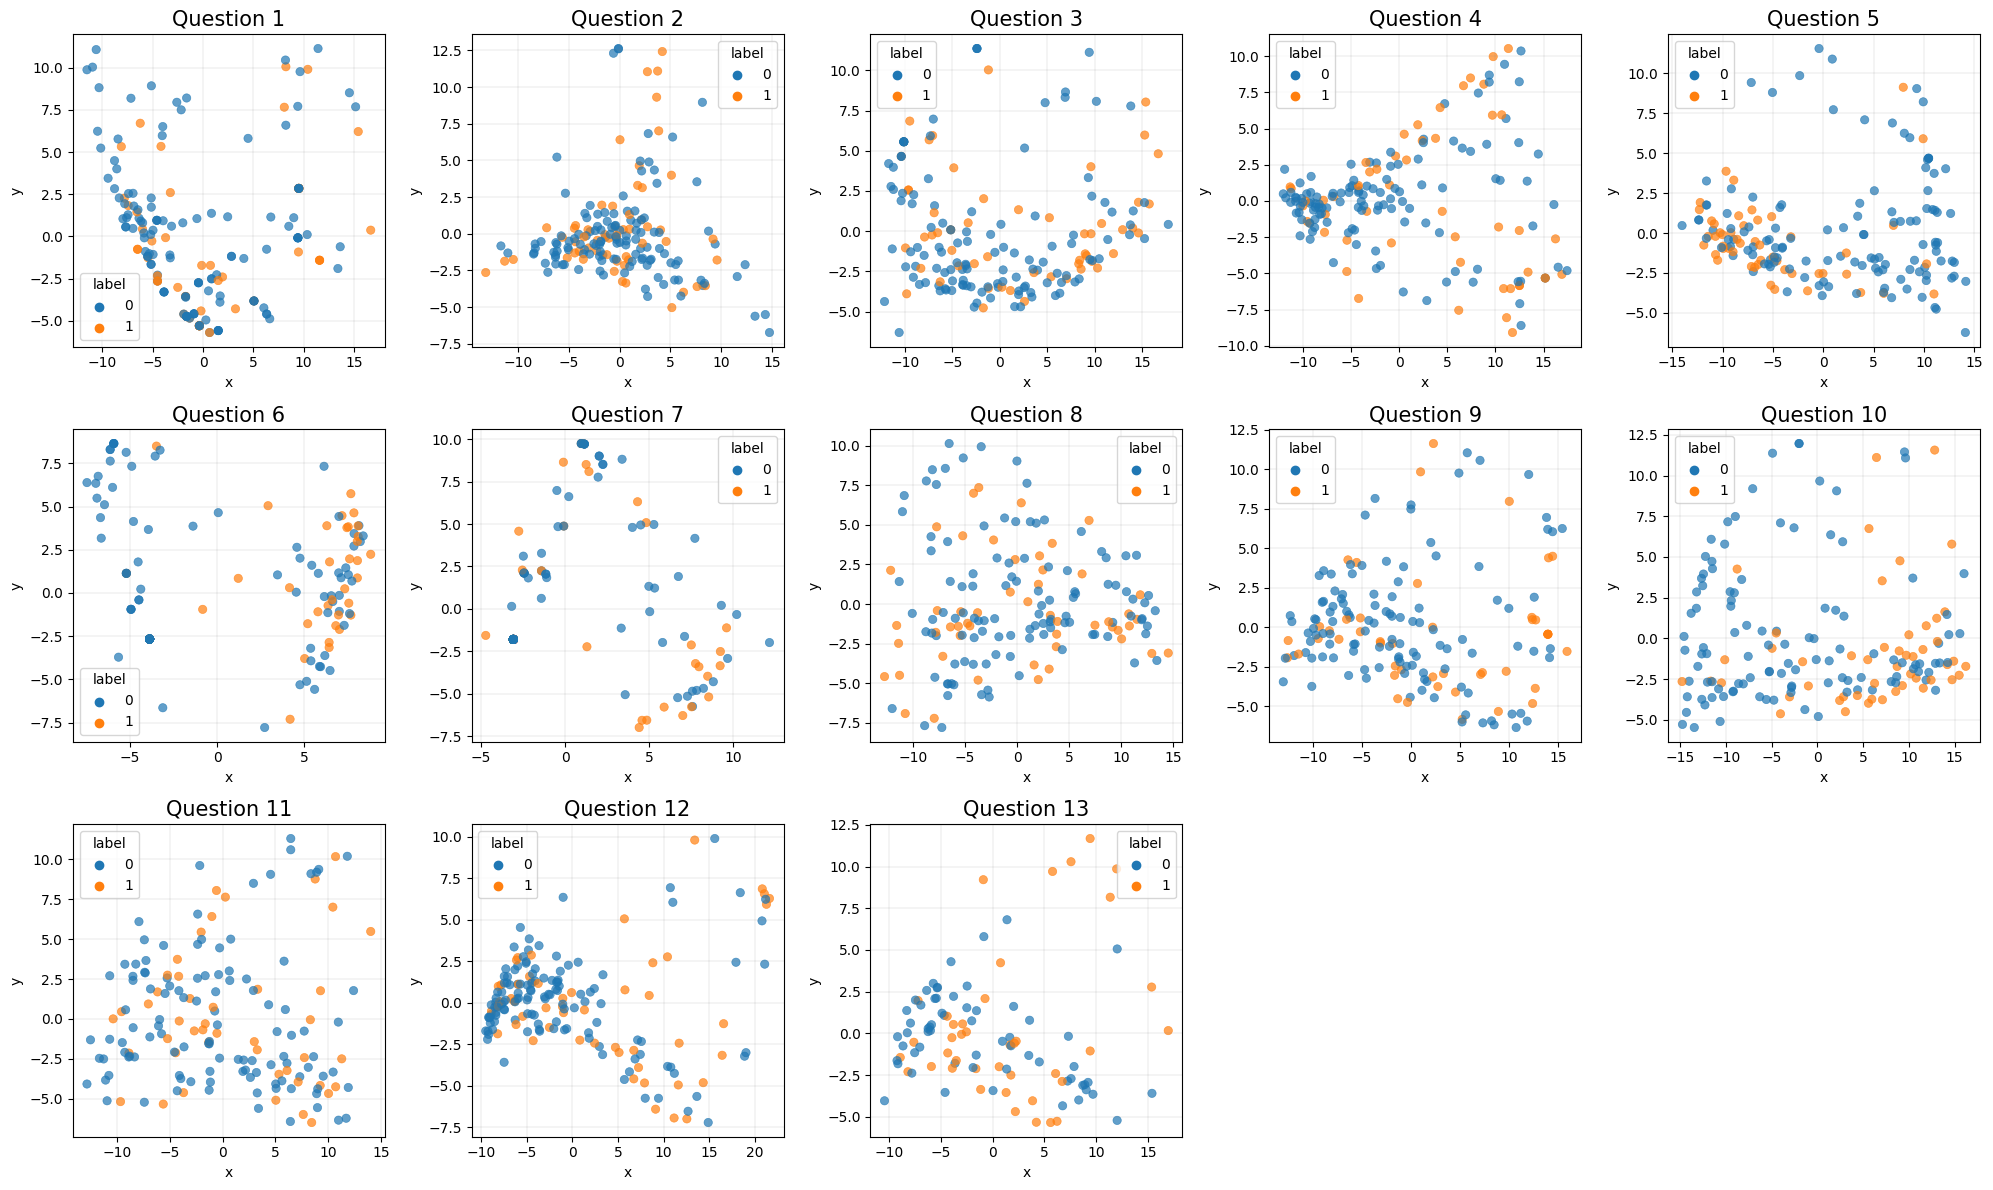

In [15]:
embeds, labels, questions = get_data_for_visualization(data, "roberta","PHQ8_Binary")
visualize_embeddings(embeds, labels, questions,"roberta")

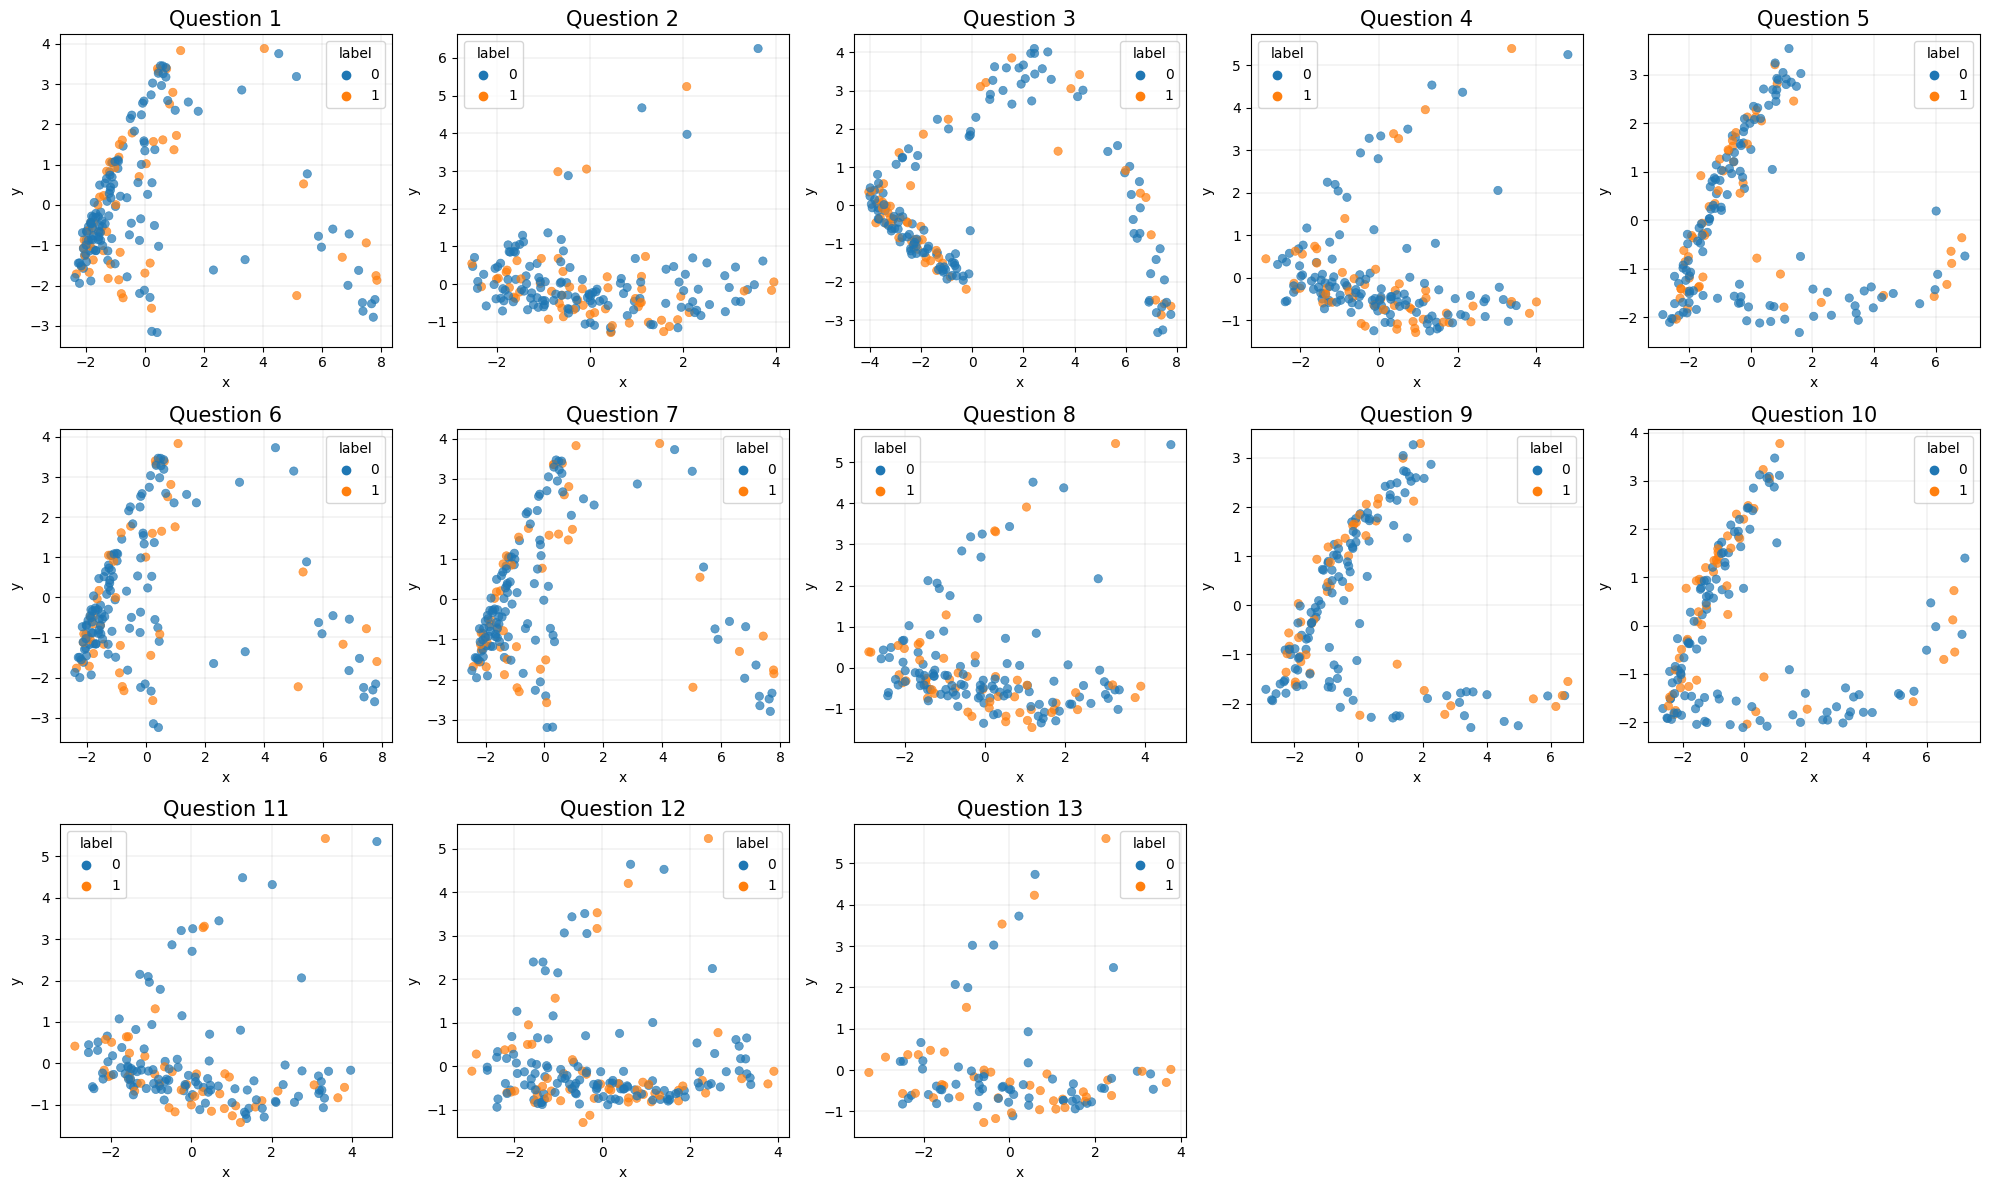

In [16]:
embeds, labels, questions = get_data_for_visualization(data, "wav2vec2","PHQ8_Binary")
visualize_embeddings(embeds, labels, questions,"wav2vec2")

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math


class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert embed_dim % num_heads == 0  # Ensure the number of heads divide the embedding dimension cleanly

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)

        self.combine_heads = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        batch_size = x.size(0)

        q = self.query(x).view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        k = self.key(x).view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        v = self.value(x).view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)

        attn_weights = F.softmax(q @ k.transpose(-2, -1) / math.sqrt(self.head_dim), dim=-1)
        out = attn_weights @ v
        out = out.permute(0, 2, 1, 3).contiguous().view(batch_size, -1, self.embed_dim)

        out = self.combine_heads(out)
        return out.squeeze(1)

class MultiModal(nn.Module):
    def __init__(self):
        super(MultiModal, self).__init__()

        self.attention_rw = MultiHeadAttention(768,4) # attention from roberta to wav2vec2
        self.attention_wr = MultiHeadAttention(768,4) # attention from wav2vec2 to roberta

        self.drop3 = nn.Dropout(0.60)

        self.norm = nn.LayerNorm(768)

        self.projector = nn.Linear(768,256)  # input size is doubled because BiLSTM returns 2*hidden_dim

        self.out = nn.Linear(256,2) # size of input should be doubled if we're concatenating the outputs

    def forward(self, roberta, wav2vec2):

        x_roberta = roberta[:,0,:]
        x_wav2vec2 = torch.mean(wav2vec2,dim=1)

        attended_rw = self.attention_rw(x_roberta) # Shape: (batch_size, seq_len_r, hidden_dim)
        attended_wr = self.attention_wr(x_wav2vec2)


        x_roberta = x_roberta * attended_rw
        x_wav2vec2 = x_wav2vec2 * attended_wr

        x = torch.add(x_roberta,x_wav2vec2)
        x = self.norm(x)
        x_embed = x.clone()
        x = self.drop3(x)

        x = F.relu(self.projector(x))


        x = self.out(x)

        return x,x_embed

def get_data_for_visualization_multimodal(data,col):
    all_questions = []
    all_embeds = []
    all_labels = []

    # Sort the unique questions
    sorted_questions = sorted(data['question'].unique())

    for question in sorted_questions:
        question_embeds = []
        question_labels = []


        embeds_wav2vec2 = torch.load(f"/content/gdrive/MyDrive/daiwoz/question_embeddings/roberta_{question}_embeddings_base.pt",map_location=torch.device('cpu'))
        embeds_roberta = torch.load(f"/content/gdrive/MyDrive/daiwoz/question_embeddings/{question}_embeddings_er.pt",map_location=torch.device('cpu'))

        model = torch.load(f"/content/gdrive/MyDrive/daiwoz/multimodal_models/{question}_multimodal_0.pth",map_location=torch.device('cpu'))
        model.eval()
        question_data = data.loc[data['question'] == question]

        for id in question_data['patient_id'].unique():
            label = question_data.loc[question_data['patient_id'] == id][col].values[0]

            wav = embeds_wav2vec2[id].unsqueeze(0)
            rob = embeds_roberta[id].unsqueeze(0)

            with torch.no_grad():
              _,multi_embeds = model(rob,wav)

            question_embeds.append(multi_embeds)
            question_labels.append(label)


        all_embeds.append(torch.stack(question_embeds))
        all_labels.append(torch.Tensor(question_labels).squeeze())
        all_questions.append(question)

    return all_embeds, all_labels, all_questions

In [24]:
embeds, labels, questions = get_data_for_visualization_multimodal(data,"PHQ_Binary_mild")

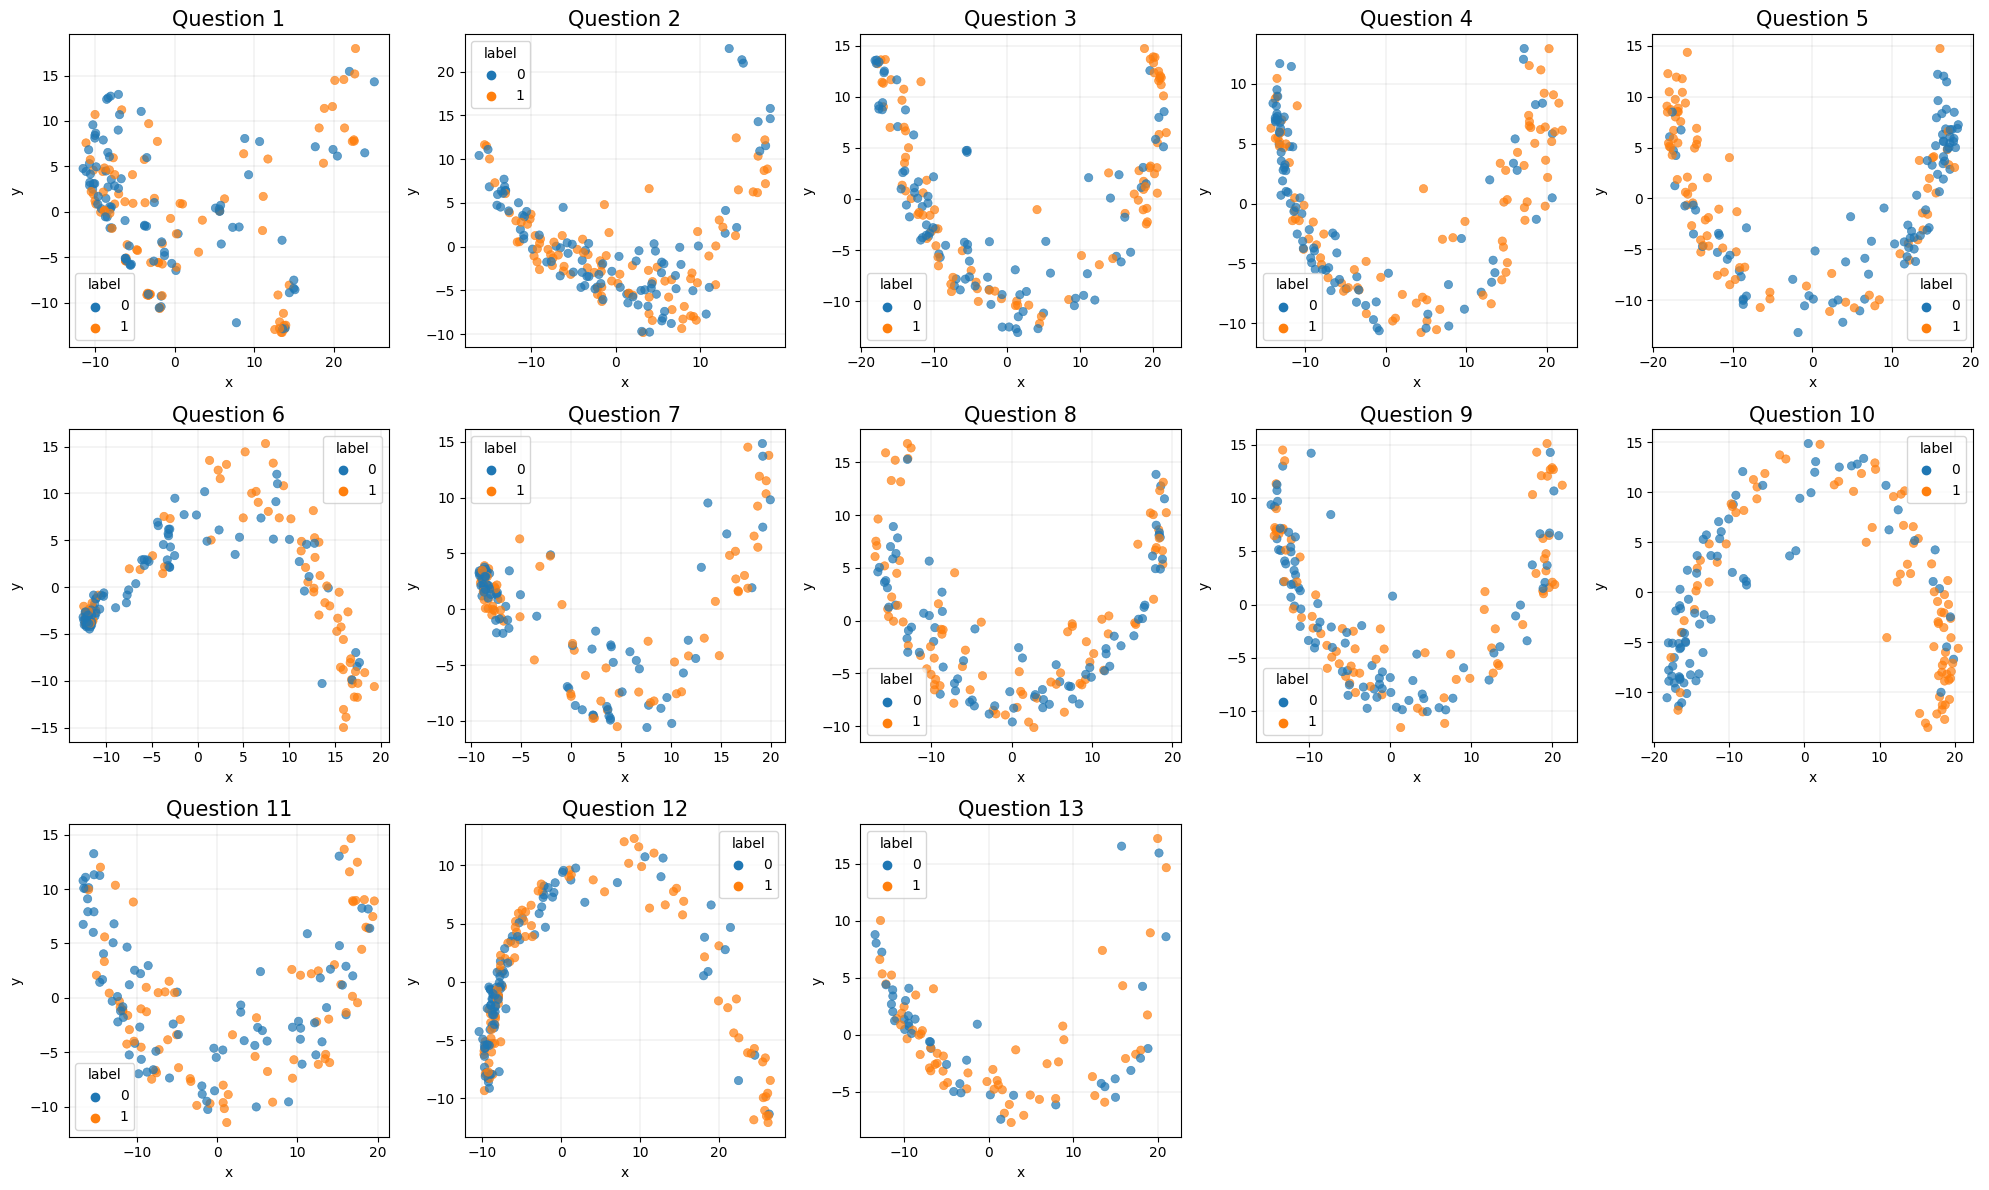

In [25]:
visualize_embeddings(embeds, labels, questions,"multimodal")

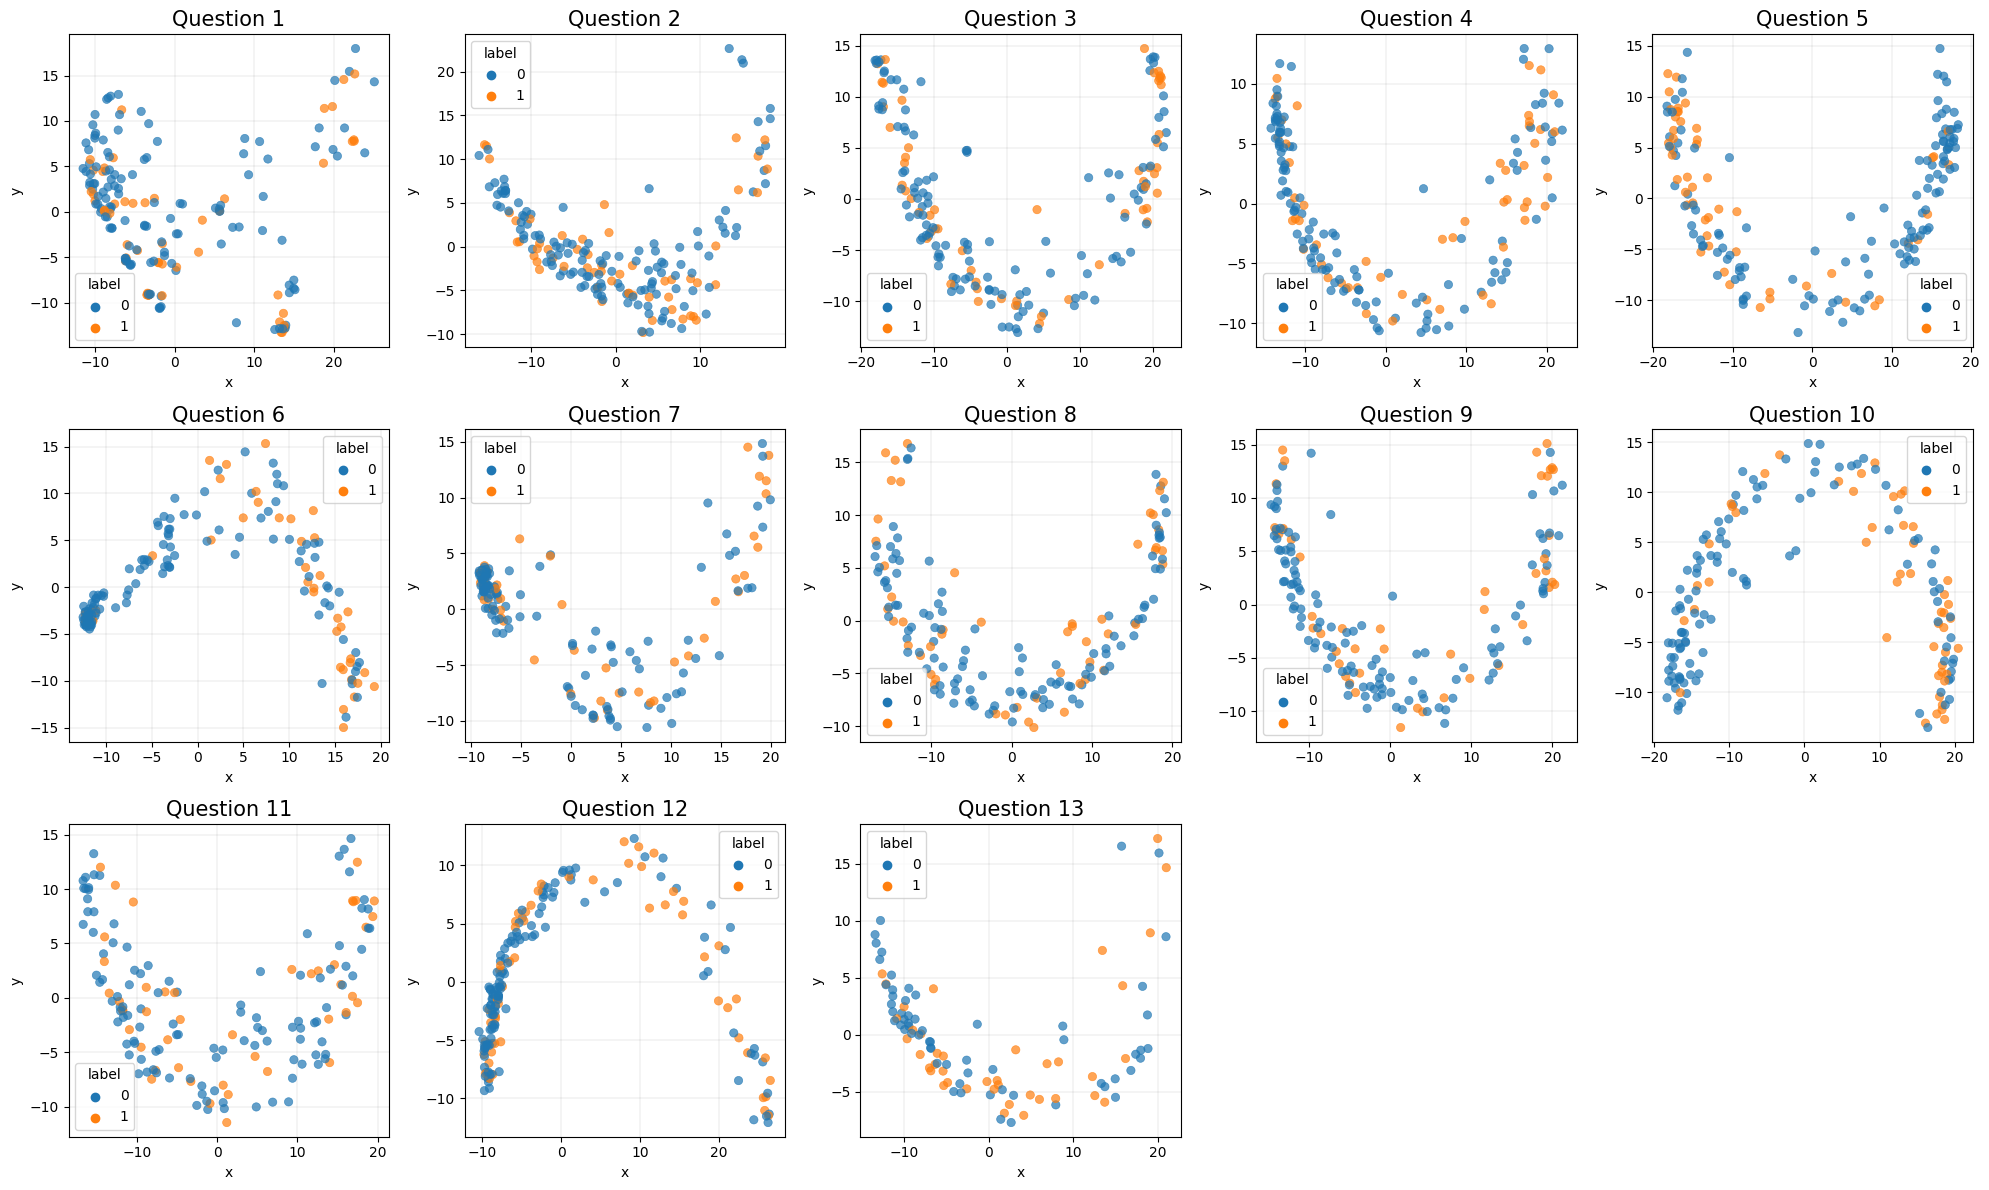

In [26]:
embeds, labels, questions = get_data_for_visualization_multimodal(data,"PHQ8_Binary")
visualize_embeddings(embeds, labels, questions,"multimodal")